In [1]:
!pip install dfply
!pip install ggplot
!pip install pandas==0.19.2

     |████████████████████████████████| 614kB 2.8MB/s 
     |████████████████████████████████| 2.2MB 2.8MB/s 
     |████████████████████████████████| 18.9MB 2.9MB/s 
ERROR: plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
ERROR: mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: fbprophet 0.5 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Loading data from the google drive to colab notebook

# Please change the filename as per the location where the file is stored

filename = '/content/drive/My Drive/Packt_Colab/bank-full.csv'

In [0]:
from dfply import *
from ggplot import *

In [0]:
bankData = pd.read_csv(filename,sep=";")
# Grouping the banking data using piping function
bankSub1 = (bankData>> mask(X.y == 'yes') >>group_by(X.age) >>summarise(agegrp = X.y.count()))

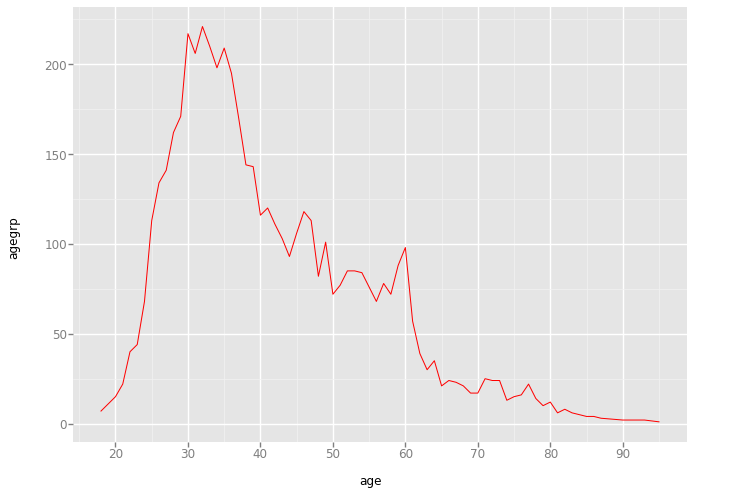

<ggplot: (-9223363259691055286)>

In [5]:
# Visualising the relationship using ggplot
ggplot(bankSub1,aes('age','agegrp')) +  geom_line(color = 'red')

In [0]:
# Getting another perspective
ageTot = (bankData >> group_by(X.age) >> summarise(ageTot = X.y.count()))

In [0]:
# Getting all the details in one place
ageProp = (bankData >> group_by(X.age,X.y) >> summarise(ageCat = X.y.count()))

In [0]:
# Merging both the data frames
ageComb = (pd.merge(ageProp,ageTot,left_on = ['age'],right_on = ['age']) >> mutate(catProp = (X.ageCat/X.ageTot)*100))

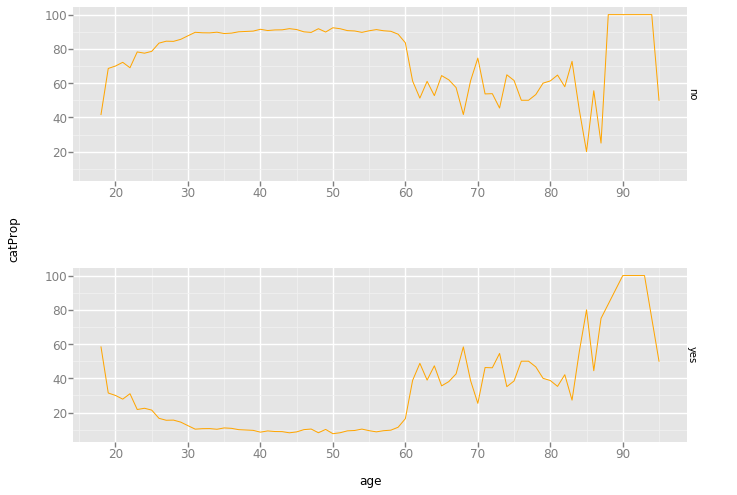

<ggplot: (-9223363259693237693)>

In [9]:
# Creating the ggplot to visualise the trend
ggplot(ageComb,aes('age','catProp')) + geom_line(color='orange') + facet_grid('y')